<a href="https://colab.research.google.com/github/Danicoder/ChuletasGit/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASO PRÁCTICO DBSCAN: DETECCION DE TRANSACCIONES FRAUDULENTAS

In [43]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn import metrics
import pandas as pd

Definimos la pureza

In [44]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [46]:
df = pd.read_csv('creditcard.csv')

 cantidad de características de entrada y la cantidad total de registros

In [47]:
len(df)

57531

 cantidad de registros legales e ilegales

In [48]:
df.value_counts()

Time   V1         V2         V3         V4         V5         V6         V7         V8         V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25        V26        V27        V28       Amount  Class
43153  -2.086016   2.203265   1.654339   2.941050  -1.683045   0.529728  -1.352162   1.793449  -0.723686   0.600365  -0.982212  -0.551636  -1.337000   0.834403   1.251862   0.033455   1.067978   0.160510   0.213087   0.079002   0.216444   0.567241  -0.035345   0.370201   0.157378   0.440341   0.210230  0.090558  0.76    0.0      9
42303  -1.373784  -0.080674   2.711809   1.347128   0.256678  -0.351185  -0.428362   0.200538   0.281153  -0.453012  -0.954829   0.429874   0.266426  -0.598452  -0.173526  -0.619363   0.256819  -0.082466   0.936687   0.164346  -0.068448  -0.123802  -0.130061   0.403627   0.310352  -0.336794  -0.084476  0.267646  1.00    0.0      4
29150   1.218702   0.177978   0.307746   1.131989  -0.196770  -0.403596   0.065584  -0.094974   0.358942  -0.106009  -1.101184   0.118125  -0.169731   0.130161   0.284551   0.010156  -0.376658  -0.257847   0.126905  -0.113694  -0.236935  -0.605319  -0.059527  -0.167249   0.591082  -0.481346   0.024247  0.022717  22.55   0.0      4
31964   1.202754   0.395072   0.233037   1.237243  -0.012361  -0.508524   0.279064  -0.146587  -0.362003   0.135150   1.231756   1.549810   0.820271   0.239401  -0.824368  -0.228037  -0.423158  -0.069722   0.154799  -0.094652   0.026782   0.258716  -0.169719   0.386205   0.845610  -0.281712   0.012573  0.005457  1.00    0.0      4
24646   1.100828   0.115819   1.539031   1.643405  -0.753781   0.227847  -0.629308   0.085986   2.116901  -0.705141   0.689061  -1.192302   2.479713   0.819953  -1.038317  -0.667817   1.044128  -0.714929  -0.666192  -0.187548  -0.273328  -0.166427   0.092607   0.374218   0.335810  -0.488461   0.070995  0.030446  1.00    0.0      4
                                                                                                                                                                                                                                                                                                                                          ..
30072   0.455600  -2.183948  -1.091522  -0.338341  -0.728954  -0.059498   0.488286  -0.364774  -0.813771   0.363418  -1.930155  -0.307939   0.804639  -0.003164   0.093104  -1.332156  -0.196432   1.124497  -0.111135   0.670659  -0.208799  -1.205444  -0.659981  -0.920832   0.431733   1.119376  -0.171194  0.079072  549.80  0.0      1
        1.364046  -0.967586   0.854020  -0.986977  -1.259759   0.439130  -1.504514   0.315493  -0.194922   0.778236   0.134792  -0.877814  -0.531394  -0.286025   0.816419   2.290643  -0.663828   0.370435   0.833494   0.108667   0.406506   1.025586  -0.237960  -0.822405   0.399415   0.014686   0.043109  0.011254  24.99   0.0      1
30073  -6.037393   5.365320  -9.780794   4.193648  -5.104391  -3.156852  -6.472880   4.320926  -2.537853  -6.516183   3.428367  -7.168570  -0.977712  -8.516166   0.993892  -4.793078  -7.958642  -2.642230   0.786847   0.814474   0.910613  -0.586822  -0.102259  -0.047552   0.183755  -0.282898   1.231827  0.284507  89.99   0.0      1
       -0.454523  -0.364390   1.998490  -2.436417  -1.013486  -0.317252  -0.178888   0.037290  -2.396375   0.649217   0.748225   0.125337   0.796518  -0.754725  -2.051693  -0.462755   0.322385   0.063635  -0.190987  -0.288790  -0.302751  -0.452252  -0.085219   0.300116   0.059783  -0.509268   0.092721  0.088790  29.04   0.0      1
30062  -0.838320   0.911544   0.702347   1.025775  -0.620179  -0.487870   1.175012   0.137630  -1.061632  -0.640198  -0.504108   0.528843   1.149560   0.473582   0.870397  -0.212324  -0.095101   0.097632   0.375857   0.356622   0.320647   0.571107   0.311397   0.402495  -0.121916  -0.341751  -0.009344  0.117680  193.90  0.0      1
Name: cou

Visualizamos los tipos de datos de cado uno de nuestras características

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57531 entries, 0 to 57530
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57531 non-null  int64  
 1   V1      57531 non-null  float64
 2   V2      57531 non-null  float64
 3   V3      57531 non-null  float64
 4   V4      57531 non-null  float64
 5   V5      57530 non-null  float64
 6   V6      57530 non-null  float64
 7   V7      57530 non-null  float64
 8   V8      57530 non-null  float64
 9   V9      57530 non-null  float64
 10  V10     57530 non-null  float64
 11  V11     57530 non-null  float64
 12  V12     57530 non-null  float64
 13  V13     57530 non-null  float64
 14  V14     57530 non-null  float64
 15  V15     57530 non-null  float64
 16  V16     57530 non-null  float64
 17  V17     57530 non-null  float64
 18  V18     57530 non-null  float64
 19  V19     57530 non-null  float64
 20  V20     57530 non-null  float64
 21  V21     57530 non-null  float64
 22

Cokmprobamos los valores nulos

In [59]:
df.isna().any()

,0
V1,False
V2,False
V3,False
V4,False
V5,True
V6,True
V7,True
V8,True
V9,True
V10,True


 Calculamos los percentiles de las características

In [51]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57531.000000,57531.000000,57531.000000,57531.000000,57531.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,...,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000,57530.000000
mean,31174.497036,-0.238428,-0.008003,0.690217,0.171634,-0.259999,0.102886,-0.117290,0.056047,0.072816,...,-0.027627,-0.106286,-0.039311,0.007152,0.136122,0.019951,0.003049,0.003816,94.962293,0.002764
std,13539.038696,1.866750,1.643754,1.456780,1.387928,1.399214,1.309931,1.257196,1.195360,1.188572,...,0.724830,0.636313,0.593646,0.596662,0.438116,0.499105,0.385182,0.324382,258.751582,0.052499
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,25507.000000,-0.994263,-0.581955,0.207691,-0.727949,-0.877906,-0.635432,-0.606257,-0.145380,-0.642709,...,-0.228755,-0.526347,-0.180006,-0.324593,-0.127942,-0.330253,-0.063536,-0.006459,7.680000,0.000000
50%,35149.000000,-0.244696,0.074661,0.783055,0.182391,-0.293590,-0.152452,-0.075688,0.061320,-0.032749,...,-0.063960,-0.080801,-0.051994,0.062228,0.174801,-0.075565,0.008744,0.022469,25.990000,0.000000
75%,41392.500000,1.155070,0.731609,1.417419,1.054230,0.279316,0.491946,0.424691,0.335839,0.751398,...,0.112220,0.308579,0.078774,0.402531,0.422282,0.297036,0.082397,0.076176,87.440000,0.000000
max,47946.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


Representamos la gráfica

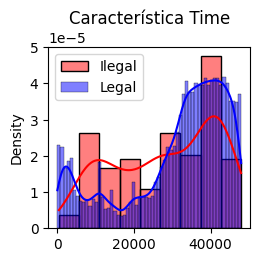

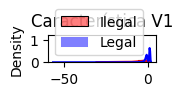

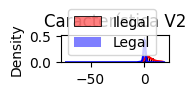

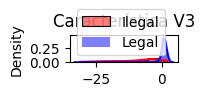

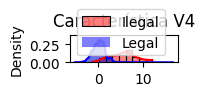

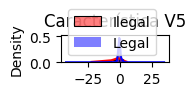

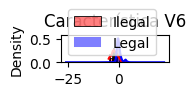

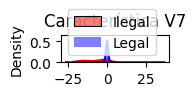

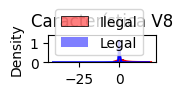

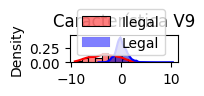

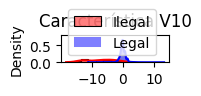

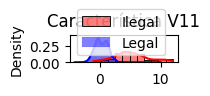

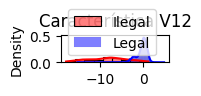

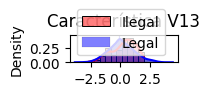

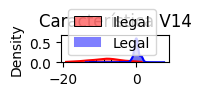

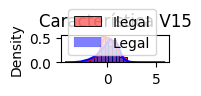

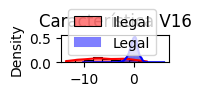

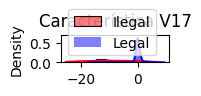

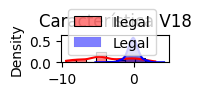

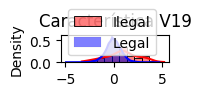

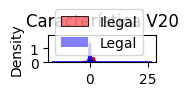

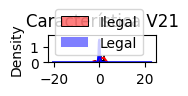

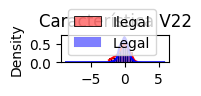

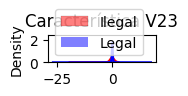

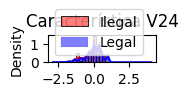

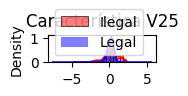

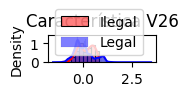

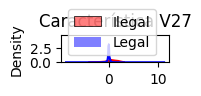

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


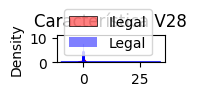

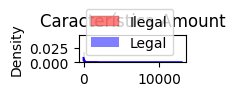

In [52]:
features = df.drop("Class", axis=1)
plt.figure(figsize=(12, 32))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    # Usando histplot para los casos donde Class == 1
    sns.histplot(data=df[df["Class"] == 1], x=f, kde=True,
    color="red", stat="density", label="Ilegal", alpha=0.5)
    # Usando histplot para los casos donde Class == 0
    sns.histplot(data=df[df["Class"] == 0], x=f, kde=True,
    color="blue", stat="density", label="Legal", alpha=0.5)
    ax.set_xlabel('')
    ax.set_title(f"Característica {f}")
    ax.legend()
    plt.show()

Representamos gráficamente s V10 y V14.

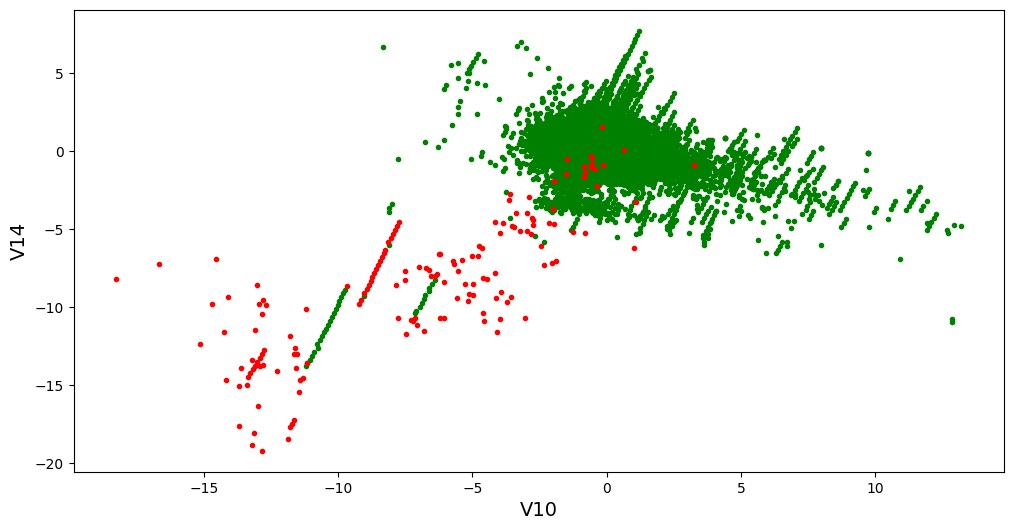

In [53]:
plt.figure(figsize=(12, 6))
plt.scatter(df["V10"][df['Class'] == 0], df["V14"][df['Class'] == 0], c="g", marker=".")
plt.scatter(df["V10"][df['Class'] == 1], df["V14"][df['Class'] == 1], c="r", marker=".")
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

Eliminamos las características de entrada Time y Amount

In [54]:
df = df.drop(["Time", "Amount"], axis=1)

Separamos las dos características

In [55]:
X = df[["V10", "V14"]].copy()
y = df["Class"].copy()

Importamos las librerías DBSCAN y entrenamos

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer

dbscan = DBSCAN(eps=0.15, min_samples=13)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
dbscan.fit(X_imputed)

DBSCAN(eps=0.15, min_samples=13)

Definimos la función gráfica del algoritmo DBSCAN

In [64]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    plt.scatter(cores[:, 0], cores[:, 1],
    c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
    c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
    c="r", marker=".", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
    c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("epsilon={:.2f}, min_samples={}".format(dbscan.eps,
    dbscan.min_samples), fontsize=14)

Mostramos la gráfica DBSCAN

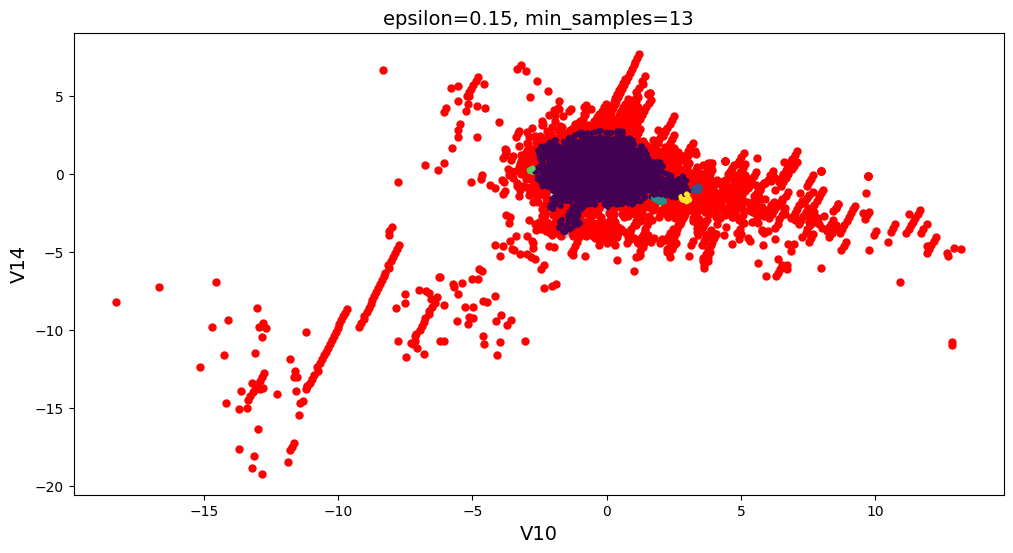

In [66]:
plt.figure(figsize=(12, 6))
plot_dbscan(dbscan, X.values, size=100)
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

Mostramos los resultados de manera numérica

In [69]:
from collections import Counter

counter = Counter(dbscan.labels_.tolist())
bad_counter = Counter(dbscan.labels_[y == 1].tolist())

for key in sorted(counter.keys()):
    print("Cluster {0} tiene {1} ejemplos - {2} ilegales".format(
    key, counter[key], bad_counter[key]))

Cluster -1 tiene 1756 ejemplos - 144 ilegales
Cluster 0 tiene 55695 ejemplos - 14 ilegales
Cluster 1 tiene 18 ejemplos - 1 ilegales
Cluster 2 tiene 31 ejemplos - 0 ilegales
Cluster 3 tiene 10 ejemplos - 0 ilegales
Cluster 4 tiene 21 ejemplos - 0 ilegales


Asignamos a las variables X e y de entrada y salida

In [84]:
# Elimina filas con NaN en la columna 'Class'
df_clean = df.dropna(subset=["Class"])

X = df_clean.drop("Class", axis=1)
y = df_clean["Class"].copy()
X
y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
57525,0.0
57526,0.0
57527,0.0
57528,0.0


In [85]:
# Elimina filas con NaN en la columna 'Class'
df_clean = df.dropna(subset=["Class"])

 Importamos la librería RandomForestClassifier y entrenamos

In [86]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X, y)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

 Seleccionamos las características más importantes.

In [87]:
feature_importances = {name: score for name, score in
zip(list(df), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

Reducimos el conjunto de datos a las siete características más importantes.

In [88]:
X_reducido = X[list(feature_importances_sorted.head(7).index)].copy()

Mostramos el conjunto de datos reducido

In [89]:
X_reducido

,V17,V14,V16,V12,V11,V9,V18
0,0.207971,-0.311169,-0.470401,-0.617801,-0.551600,0.363787,0.025791
1,-0.114805,-0.143772,0.463917,1.065235,1.612727,-0.255425,-0.183361
2,1.109969,-0.165946,-2.890083,0.066084,0.624501,-1.514654,-0.121359
3,-0.684093,-0.287924,-1.059647,0.178228,-0.226487,-1.387024,1.965775
4,-0.237033,-1.119670,-0.451449,0.538196,-0.822843,0.817739,-0.038195
...,...,...,...,...,...,...,...
57525,0.082982,-0.309864,-1.535955,0.078131,-1.297626,-0.491940,0.756964
57526,-0.125371,0.498589,-0.222097,0.078180,-0.234341,0.031110,-0.548831
57527,-1.311464,-0.241249,0.635220,0.592729,0.360765,-0.290188,0.423780
57528,-0.359178,0.454367,0.182817,-0.208870,-0.672187,0.248587,-0.537780


 Volvemos a ejecutar DBSCAN

In [90]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.70, min_samples=25)
dbscan.fit(X_reducido)

DBSCAN(eps=0.7, min_samples=25)

Mostramos los resultados

In [91]:
counter = Counter(dbscan.labels_.tolist())
bad_counter = Counter(dbscan.labels_[y == 1].tolist())
for key in sorted(counter.keys()):
    print("Cluster {0} tiene {1} ejemplos - {2} ilegales".format(
    key, counter[key], bad_counter[key]))

Cluster -1 tiene 9895 ejemplos - 155 ilegales
Cluster 0 tiene 36930 ejemplos - 3 ilegales
Cluster 1 tiene 2771 ejemplos - 0 ilegales
Cluster 2 tiene 278 ejemplos - 0 ilegales
Cluster 3 tiene 159 ejemplos - 0 ilegales
Cluster 4 tiene 63 ejemplos - 0 ilegales
Cluster 5 tiene 102 ejemplos - 0 ilegales
Cluster 6 tiene 127 ejemplos - 0 ilegales
Cluster 7 tiene 51 ejemplos - 0 ilegales
Cluster 8 tiene 6215 ejemplos - 1 ilegales
Cluster 9 tiene 759 ejemplos - 0 ilegales
Cluster 10 tiene 26 ejemplos - 0 ilegales
Cluster 11 tiene 44 ejemplos - 0 ilegales
Cluster 12 tiene 76 ejemplos - 0 ilegales
Cluster 13 tiene 34 ejemplos - 0 ilegales


Obtenemos los clusters

In [92]:
clusters = dbscan.labels_

 Calculamos la PUREZA

In [93]:
print("Predicción Pureza:", purity_score(y, clusters))

Predicción Pureza: 0.9972362245784808


Calculamos el coeficiente Shiloutte

In [94]:
print("Predicción Shiloutte: ", metrics.silhouette_score(X_reducido, clusters, sample_size=10000))

Predicción Shiloutte:  -0.035174081653135486


Calculamos el indie Calinski Harabasz  

In [95]:
print("Predicción Indice Calinski Harabasz: ", metrics.calinski_harabasz_score(X_reducido, clusters))

Predicción Indice Calinski Harabasz:  1235.9033492252672


 Datos no esféricos con la librería make_mooons

In [96]:
from sklearn.datasets import make_moons #no esfericos

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

Dibujamos y lo mostramos

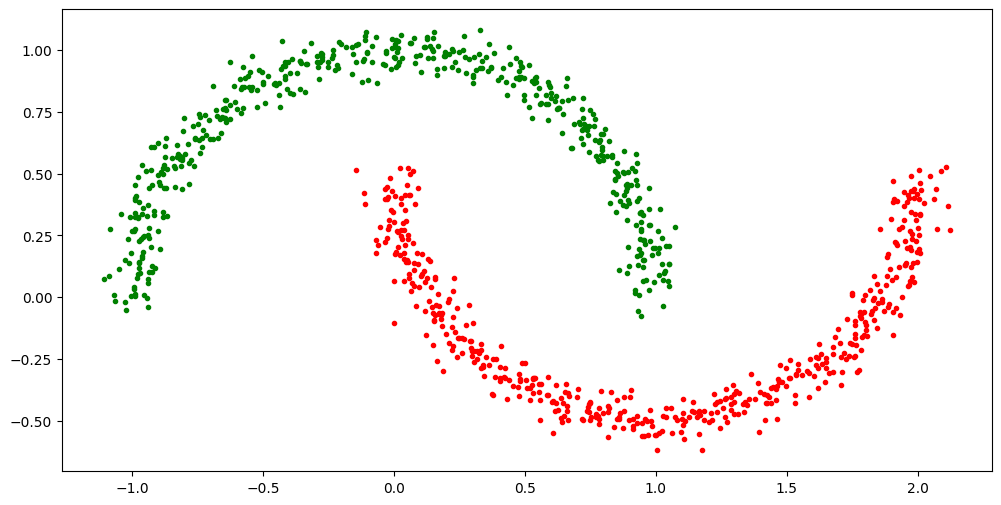

In [97]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:,0][y == 0], X[:,1][y == 0], c="g", marker=".")
plt.scatter(X[:,0][y == 1], X[:,1][y == 1], c="r", marker=".")
plt.show()

Importamos de nuevo DBSCAN y entrenamos

In [98]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.1, min_samples=6)

Límite de decisión

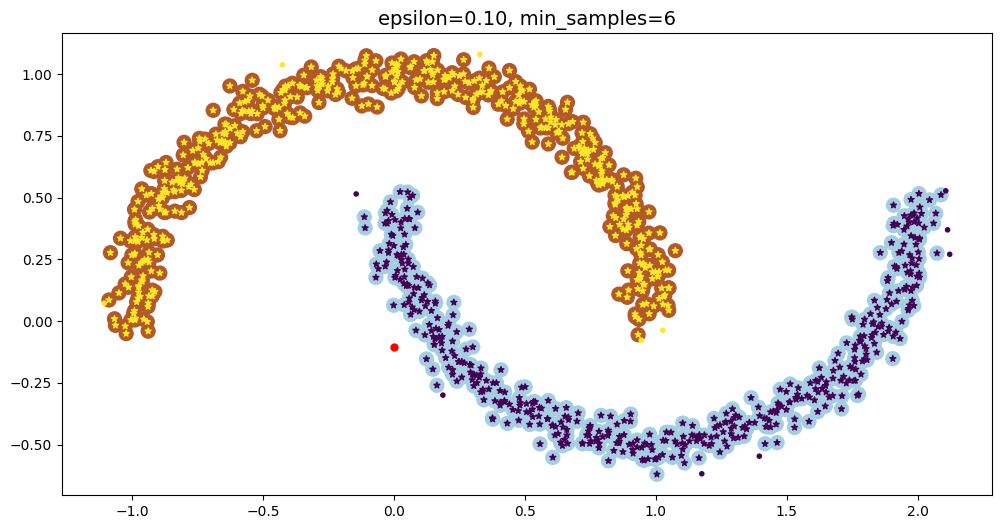

In [99]:
plt.figure(figsize=(12, 6))
plot_dbscan(dbscan, X, size=100)
plt.show()

In [100]:
counter = Counter(dbscan.labels_.tolist())
bad_counter = Counter(dbscan.labels_[y == 1].tolist())

for key in sorted(counter.keys()):
    print("Cluster {0} tiene {1} ejemplos - {2} ilegales".format(
    key, counter[key], bad_counter[key]))

Cluster -1 tiene 1 ejemplos - 1 ilegales
Cluster 0 tiene 499 ejemplos - 499 ilegales
Cluster 1 tiene 500 ejemplos - 0 ilegales
